In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 6

In [2]:
TimeFormat = lambda dates: pd.datetime.strptime(dates, "%Y-%m-%d %H:%M:%S")
data = pd.read_csv("../data/interpolated.csv", parse_dates=True, index_col='datetime', date_parser=TimeFormat)
data = data[['PM2.5']]

In [3]:
print data.head()
print "\n Data types:"
print data.dtypes

                     PM2.5
datetime                  
2016-01-01 00:00:00   66.0
2016-01-01 01:00:00   56.0
2016-01-01 02:00:00   57.0
2016-01-01 03:00:00   65.0
2016-01-01 04:00:00   67.0

 Data types:
PM2.5    float64
dtype: object


In [4]:
data.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name=u'datetime', length=8784, freq=None)

In [5]:
ts = data['PM2.5']
print ts.head(10)

datetime
2016-01-01 00:00:00    66.0
2016-01-01 01:00:00    56.0
2016-01-01 02:00:00    57.0
2016-01-01 03:00:00    65.0
2016-01-01 04:00:00    67.0
2016-01-01 05:00:00    61.0
2016-01-01 06:00:00    42.0
2016-01-01 07:00:00    38.0
2016-01-01 08:00:00    39.0
2016-01-01 09:00:00    43.0
Name: PM2.5, dtype: float64


In [6]:
#1. Specific the index as a string constant:
ts['2016-11-04 12:00:00']

39.0

In [7]:
#2. Specify the entire range:
ts['2016-6-30 12:00:00':'2016-7-1 0:00:00']

datetime
2016-06-30 12:00:00     20.0
2016-06-30 13:00:00     17.0
2016-06-30 14:00:00     16.5
2016-06-30 15:00:00     16.0
2016-06-30 16:00:00     21.0
2016-06-30 17:00:00     52.0
2016-06-30 18:00:00    178.0
2016-06-30 19:00:00    184.0
2016-06-30 20:00:00    154.0
2016-06-30 21:00:00     28.0
2016-06-30 22:00:00     15.0
2016-06-30 23:00:00     10.0
2016-07-01 00:00:00     10.0
Name: PM2.5, dtype: float64

In [8]:
#3. Specify the day:
ts['2016-09-05']

datetime
2016-09-05 00:00:00     1.0
2016-09-05 01:00:00     1.0
2016-09-05 02:00:00     1.0
2016-09-05 03:00:00     5.0
2016-09-05 04:00:00     4.0
2016-09-05 05:00:00     7.0
2016-09-05 06:00:00     6.0
2016-09-05 07:00:00     8.0
2016-09-05 08:00:00    14.0
2016-09-05 09:00:00    22.0
2016-09-05 10:00:00    19.0
2016-09-05 11:00:00    16.0
2016-09-05 12:00:00    16.0
2016-09-05 13:00:00     8.0
2016-09-05 14:00:00    14.0
2016-09-05 15:00:00     9.0
2016-09-05 16:00:00     9.0
2016-09-05 17:00:00    10.0
2016-09-05 18:00:00    10.0
2016-09-05 19:00:00    10.0
2016-09-05 20:00:00     3.0
2016-09-05 21:00:00     4.0
2016-09-05 22:00:00     3.0
2016-09-05 23:00:00     5.0
Name: PM2.5, dtype: float64

In [9]:
ts = ts['2016-10-10':'2016-10-20']

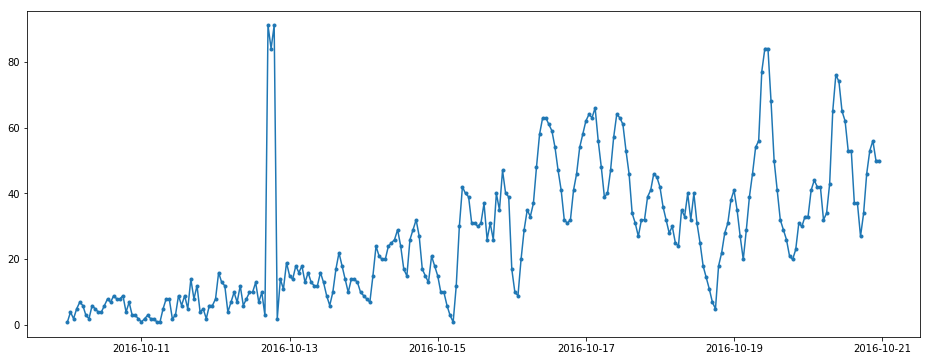

In [10]:
plt.plot(ts, '.-')
plt.show()

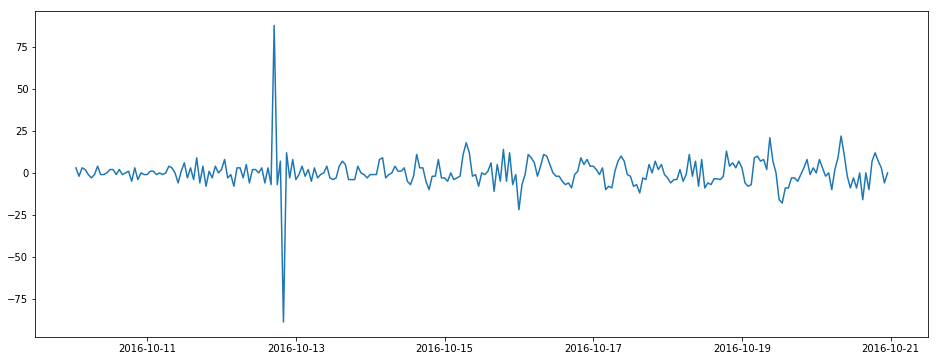

In [11]:
ts_diff = ts - ts.shift()
plt.plot(ts_diff)
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=24)
    rolstd = pd.rolling_std(timeseries, window=24)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  


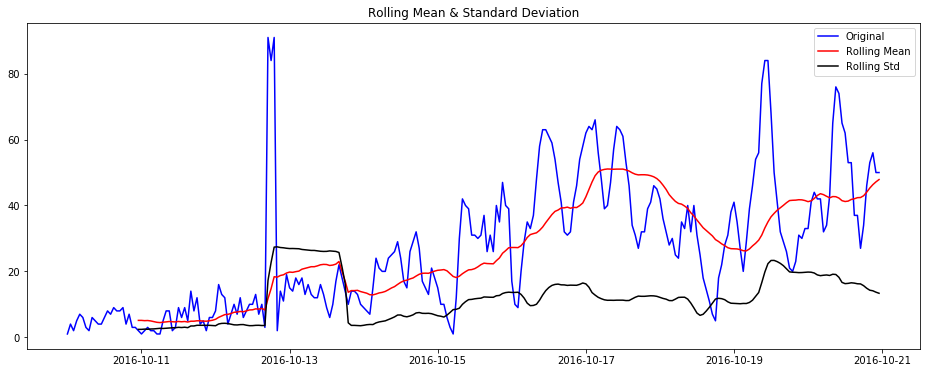

Results of Dickey-Fuller Test:
Test Statistic                  -2.010204
p-value                          0.282117
#Lags Used                       9.000000
Number of Observations Used    254.000000
Critical Value (5%)             -2.872987
Critical Value (1%)             -3.456360
Critical Value (10%)            -2.572870
dtype: float64


In [13]:
test_stationarity(ts)

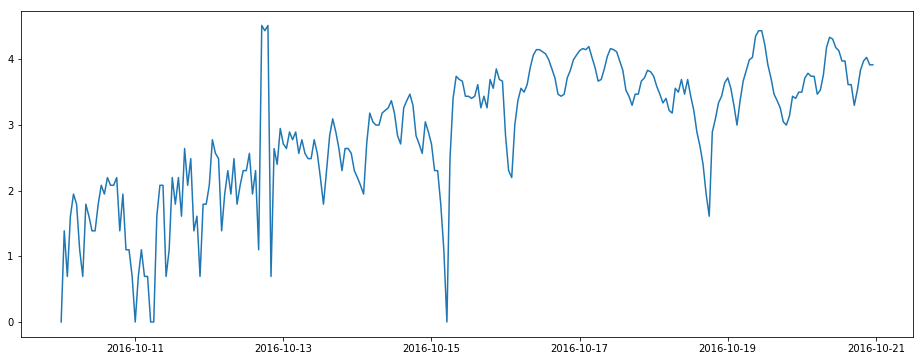

In [14]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  


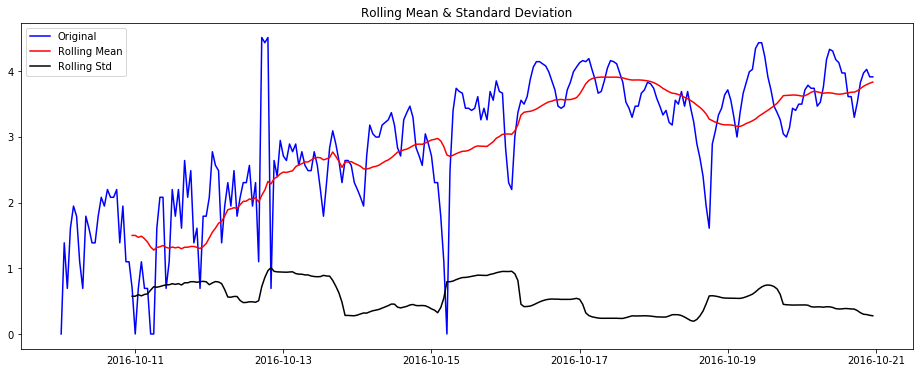

Results of Dickey-Fuller Test:
Test Statistic                  -2.394320
p-value                          0.143346
#Lags Used                       6.000000
Number of Observations Used    257.000000
Critical Value (5%)             -2.872853
Critical Value (1%)             -3.456054
Critical Value (10%)            -2.572799
dtype: float64


In [15]:
test_stationarity(ts_log)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """Entry point for launching an IPython kernel.


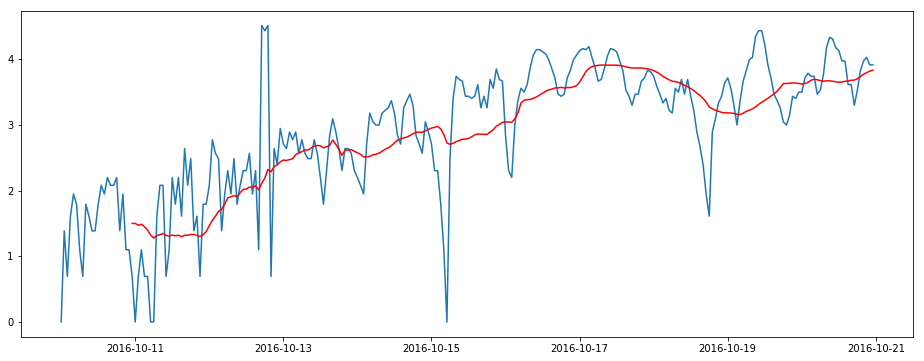

In [16]:
moving_avg = pd.rolling_mean(ts_log,24)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [17]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(24)

datetime
2016-10-10 00:00:00         NaN
2016-10-10 01:00:00         NaN
2016-10-10 02:00:00         NaN
2016-10-10 03:00:00         NaN
2016-10-10 04:00:00         NaN
2016-10-10 05:00:00         NaN
2016-10-10 06:00:00         NaN
2016-10-10 07:00:00         NaN
2016-10-10 08:00:00         NaN
2016-10-10 09:00:00         NaN
2016-10-10 10:00:00         NaN
2016-10-10 11:00:00         NaN
2016-10-10 12:00:00         NaN
2016-10-10 13:00:00         NaN
2016-10-10 14:00:00         NaN
2016-10-10 15:00:00         NaN
2016-10-10 16:00:00         NaN
2016-10-10 17:00:00         NaN
2016-10-10 18:00:00         NaN
2016-10-10 19:00:00         NaN
2016-10-10 20:00:00         NaN
2016-10-10 21:00:00         NaN
2016-10-10 22:00:00         NaN
2016-10-10 23:00:00   -0.806233
Name: PM2.5, dtype: float64

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  


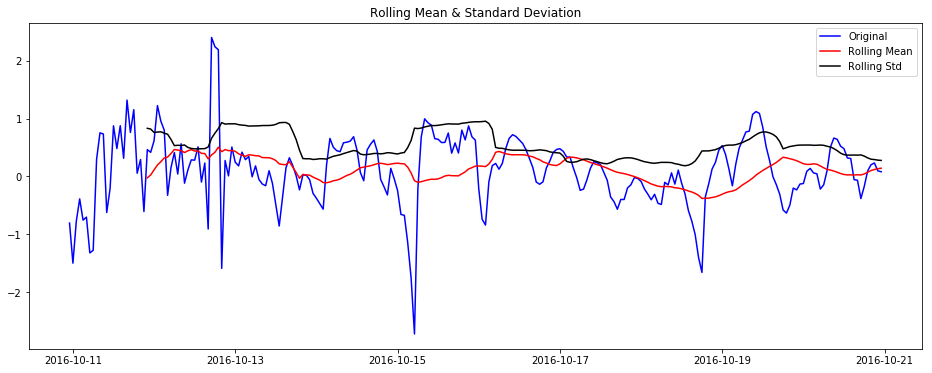

Results of Dickey-Fuller Test:
Test Statistic                  -5.643038
p-value                          0.000001
#Lags Used                       7.000000
Number of Observations Used    233.000000
Critical Value (5%)             -2.874026
Critical Value (1%)             -3.458731
Critical Value (10%)            -2.573424
dtype: float64


In [18]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=24,ignore_na=False,min_periods=0,adjust=True).mean()
  """Entry point for launching an IPython kernel.


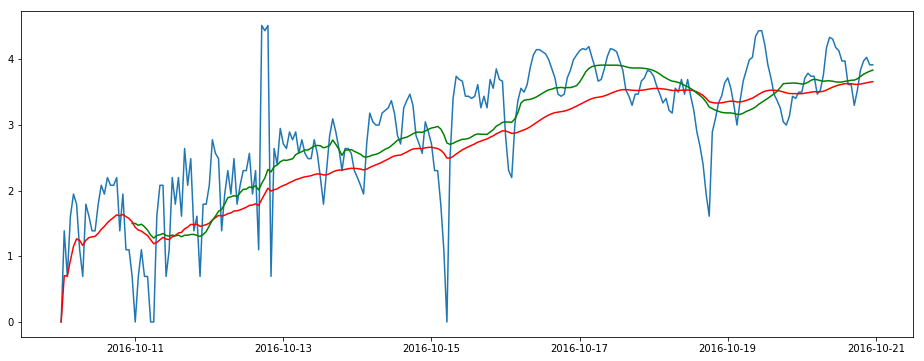

In [19]:
expwighted_avg = pd.ewma(ts_log, halflife=24)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.plot(moving_avg, color='green')
plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  


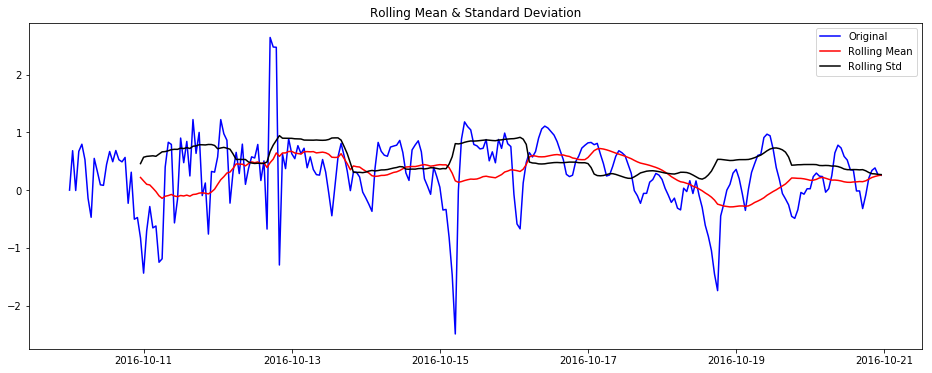

Results of Dickey-Fuller Test:
Test Statistic                  -4.500950
p-value                          0.000196
#Lags Used                       6.000000
Number of Observations Used    257.000000
Critical Value (5%)             -2.872853
Critical Value (1%)             -3.456054
Critical Value (10%)            -2.572799
dtype: float64


In [20]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

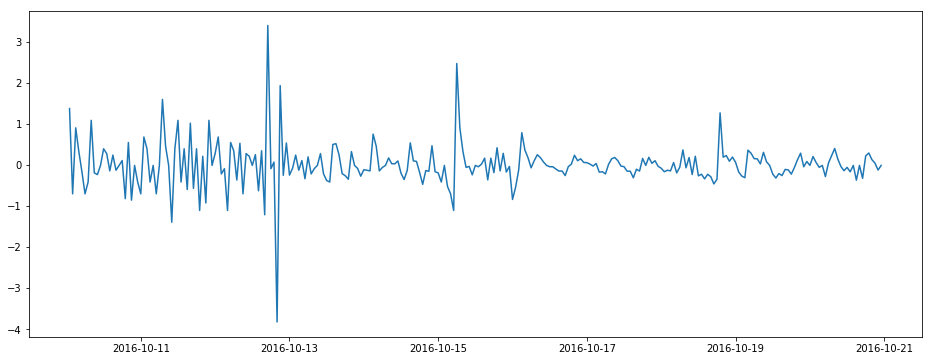

In [21]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  


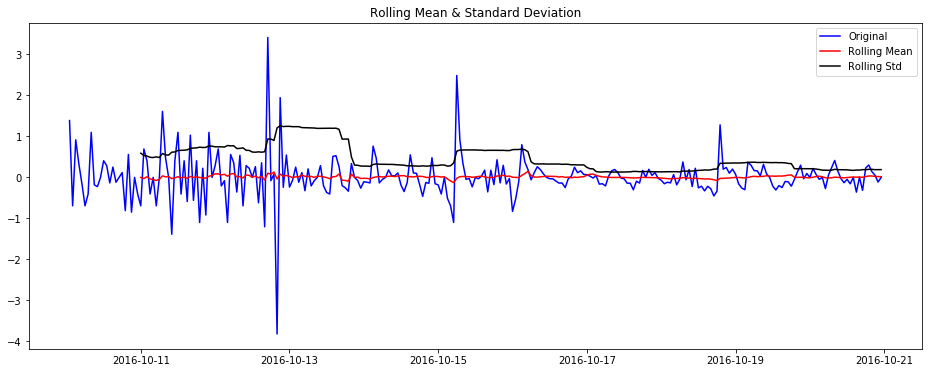

Results of Dickey-Fuller Test:
Test Statistic                -9.554557e+00
p-value                        2.519198e-16
#Lags Used                     5.000000e+00
Number of Observations Used    2.570000e+02
Critical Value (5%)           -2.872853e+00
Critical Value (1%)           -3.456054e+00
Critical Value (10%)          -2.572799e+00
dtype: float64


In [22]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

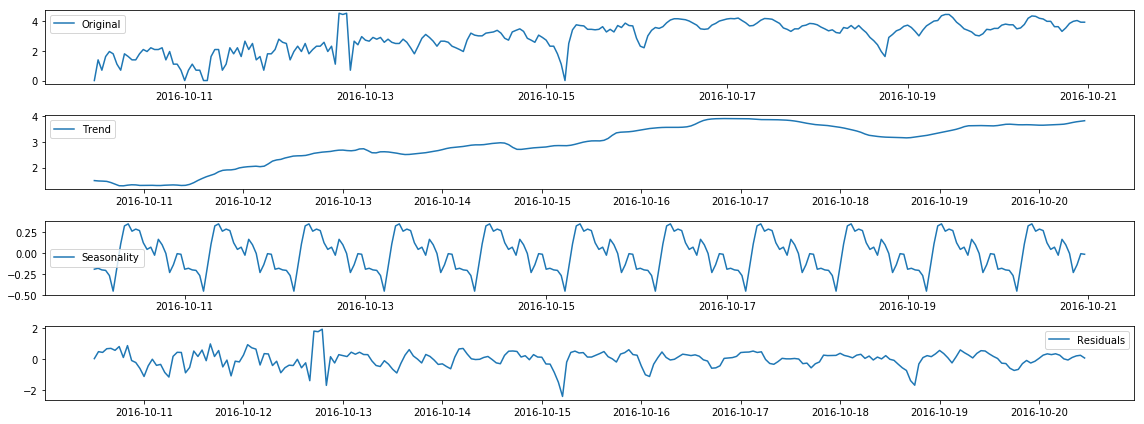

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  """
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).std()
  


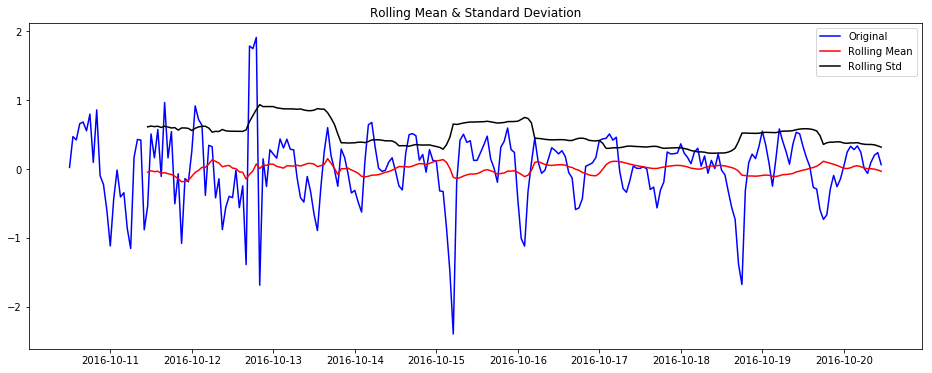

Results of Dickey-Fuller Test:
Test Statistic                -6.875502e+00
p-value                        1.478195e-09
#Lags Used                     7.000000e+00
Number of Observations Used    2.320000e+02
Critical Value (5%)           -2.874080e+00
Critical Value (1%)           -3.458855e+00
Critical Value (10%)          -2.573453e+00
dtype: float64


In [24]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [25]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [26]:
lag_acf = acf(ts_log_diff, nlags=24)
lag_pacf = pacf(ts_log_diff, nlags=24, method='ols')

In [27]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

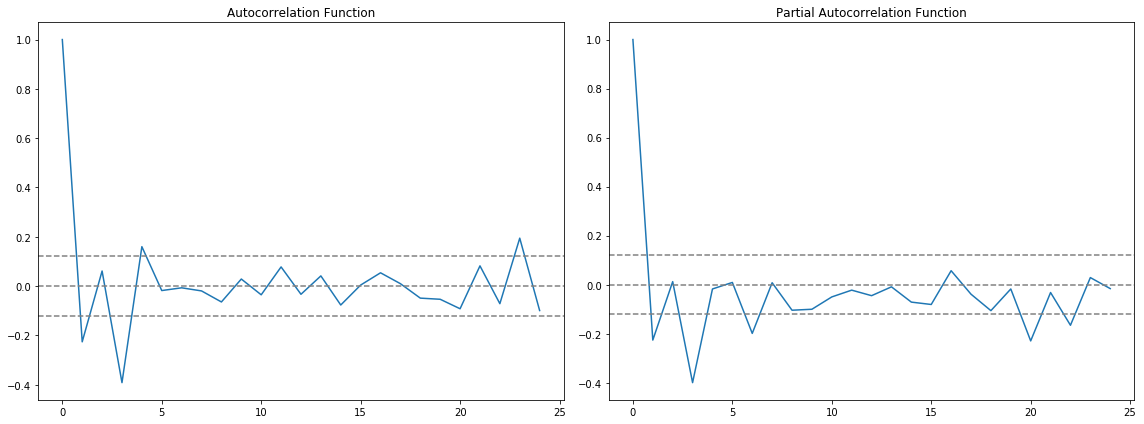

In [28]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [29]:
#Auto-Regressive Integrated Moving Averages. 

In [30]:
from statsmodels.tsa.arima_model import ARIMA

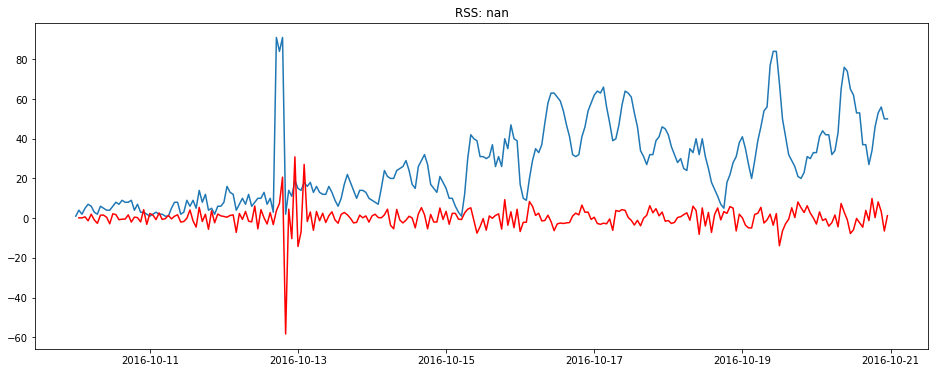

In [36]:
model = ARIMA(ts, order=(6, 1, 1))
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts)**2))
plt.show()

In [32]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

datetime
2016-10-10 01:00:00    0.012097
2016-10-10 02:00:00   -0.319361
2016-10-10 03:00:00    0.209530
2016-10-10 04:00:00   -0.703634
2016-10-10 05:00:00    0.132558
dtype: float64


In [33]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

datetime
2016-10-10 01:00:00    0.012097
2016-10-10 02:00:00   -0.307264
2016-10-10 03:00:00   -0.097734
2016-10-10 04:00:00   -0.801368
2016-10-10 05:00:00   -0.668810
dtype: float64


In [34]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


datetime
2016-10-10 00:00:00    0.000000
2016-10-10 01:00:00    0.012097
2016-10-10 02:00:00   -0.307264
2016-10-10 03:00:00   -0.097734
2016-10-10 04:00:00   -0.801368
dtype: float64

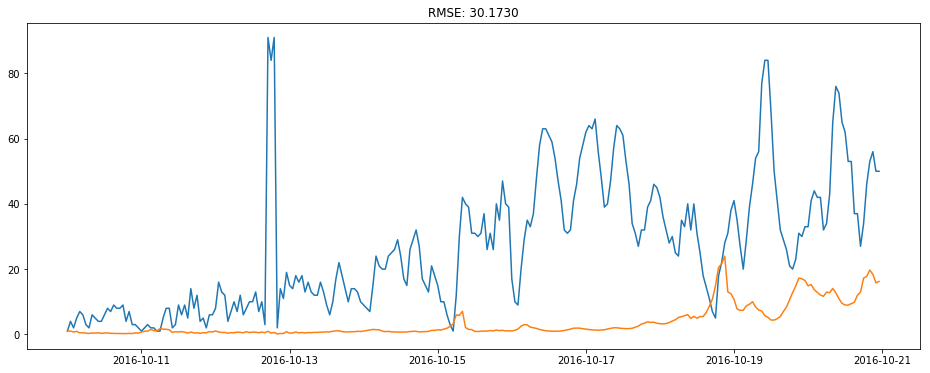

In [35]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
plt.show()